# **Rayan International AI Contest**

<font color='blue' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='blue' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [1]:
!pip install matplotlib==3.9.1
!pip install matplotlib-inline==0.1.7
!pip install scikit-learn==1.5.1
!pip install scikit-plot==0.3.7
!pip install scipy==1.11.4
!pip install seaborn==0.13.2
!pip install numpy==1.26.4
!pip install opencv-python==4.10.0.84
!pip install pandas==2.2.2
!pip install kaggle==1.6.17

In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2


## Load Dataset

In [2]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
![ ! -f rayan-homework1.zip ] && kaggle datasets download -d mojtabanafez/rayan-homework1

In [3]:
![ ! -f creditcard.csv ] && unzip ./rayan-homework1.zip

In [4]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
print(X_train)
print(y_train)

            Time        V1        V2        V3        V4        V5        V6  \
2557      2105.0 -2.289565 -0.480260  0.818685 -1.706423  0.822102 -1.660326   
247823  153702.0 -0.313717 -4.064342 -3.398445  0.704011  0.101662  1.529848   
152342   97283.0 -1.809763 -0.567439  2.265186 -0.960318 -1.212537  1.516493   
103385   68628.0  1.192319  0.178575  0.141491  0.459628 -0.049959 -0.112122   
8771     11951.0 -0.963451  0.700311  1.097333 -1.547626  0.669966  0.513533   
...          ...       ...       ...       ...       ...       ...       ...   
119879   75618.0  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165   
259178  159000.0 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076   
131932   79795.0 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198   
146867   87931.0 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695   
121958   76381.0  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028   

              V7        V8        V9  .

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [9]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
######################################################
###################### TO DO #########################
######################################################
df.describe()
######################################################
######################################################
######################################################

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


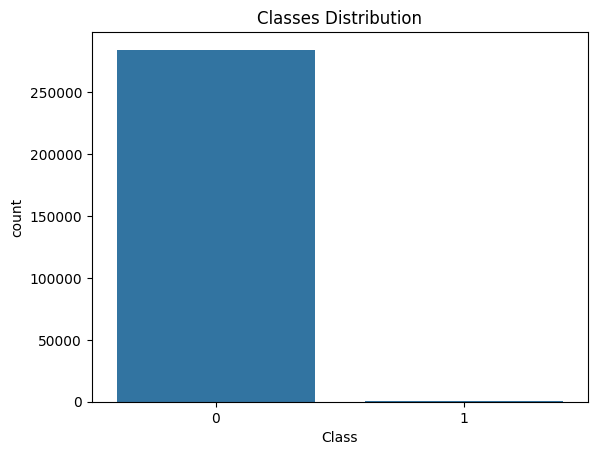

In [10]:
# ### 2.2 Class Distribution
# Visualize the class distribution
######################################################
###################### TO DO #########################
######################################################
sns.countplot(x='Class', data=df)
plt.title('Classes Distribution')
plt.show()
######################################################
######################################################
######################################################

In [11]:
# Display the class distribution in percentages
######################################################
###################### TO DO #########################
######################################################
class_distribution = df['Class'].value_counts(normalize=True) * 100
class_distribution.name = 'proportion'
print("Class Distribution:")
print(class_distribution)
######################################################
######################################################
######################################################

Class Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


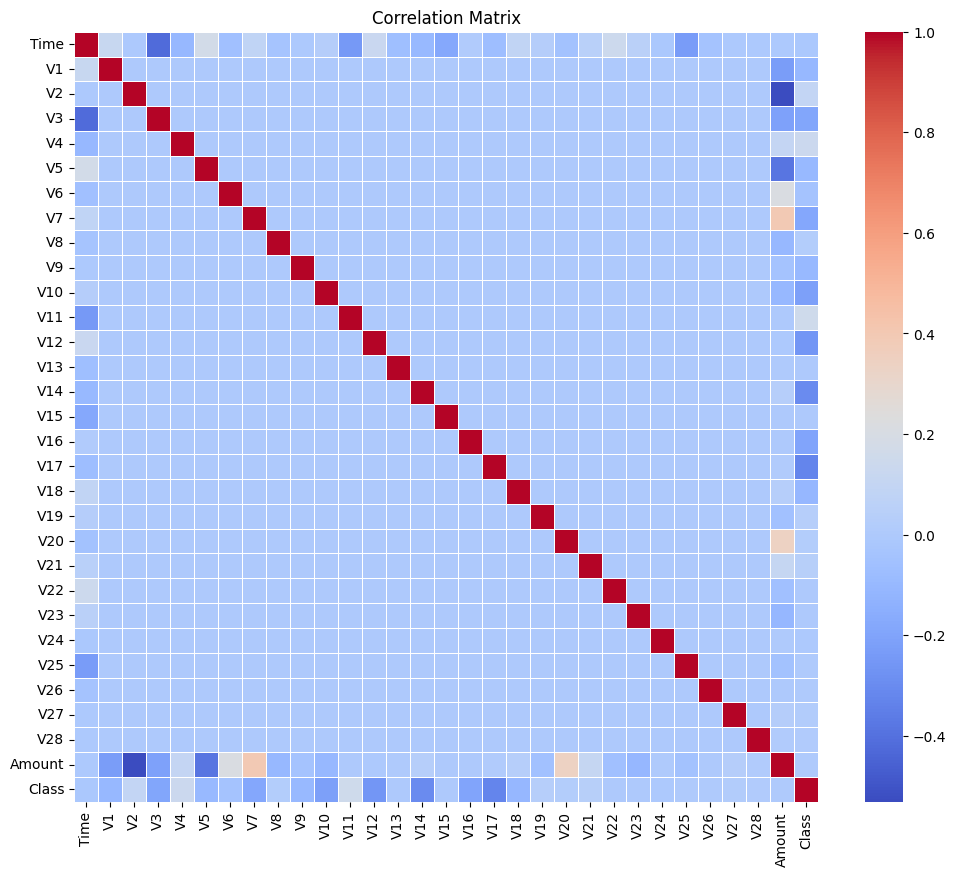

In [12]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
######################################################
###################### TO DO #########################
######################################################
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            cmap='coolwarm', 
            linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
######################################################
######################################################
######################################################

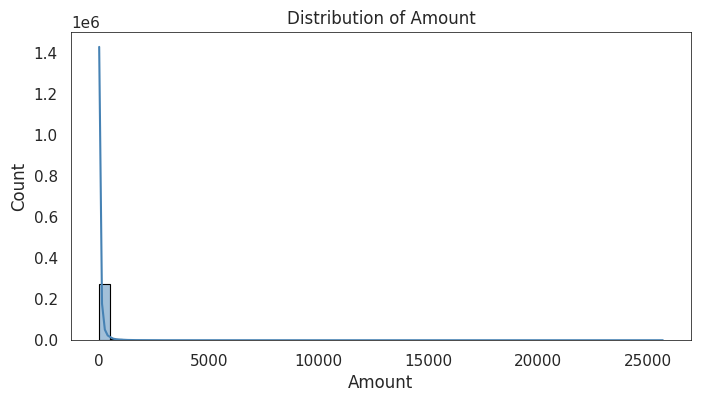

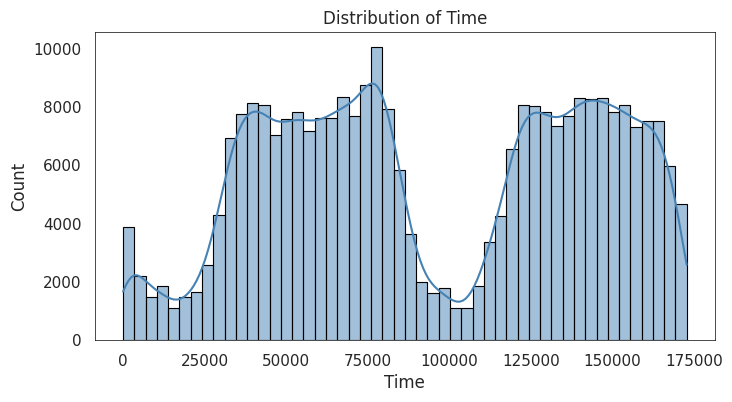

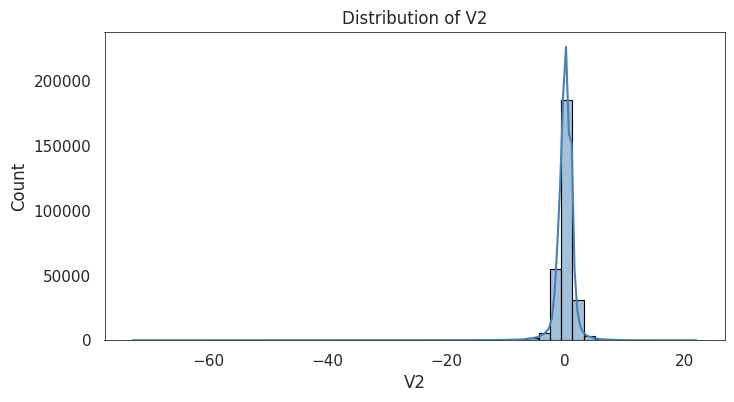

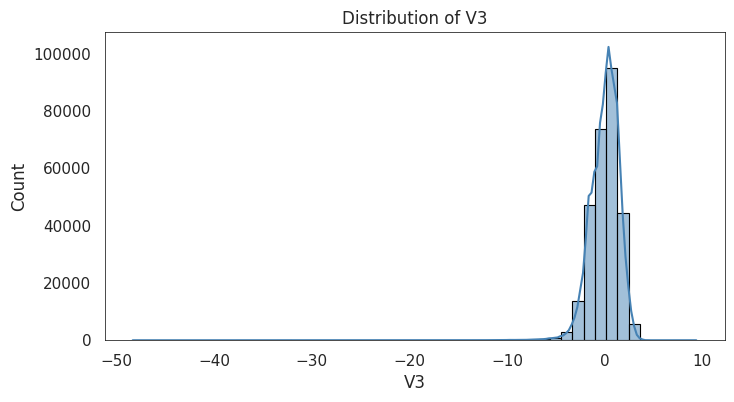

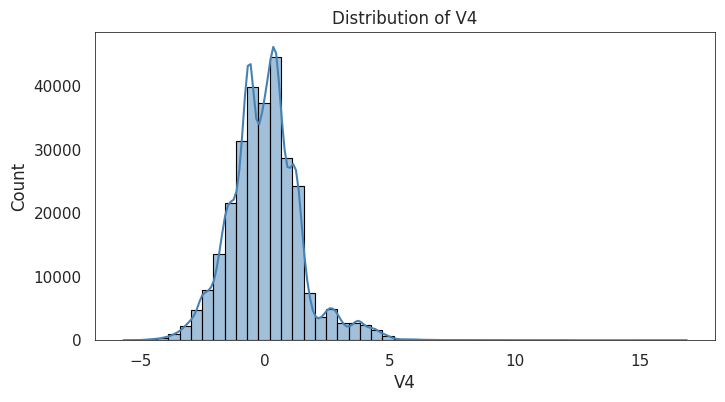

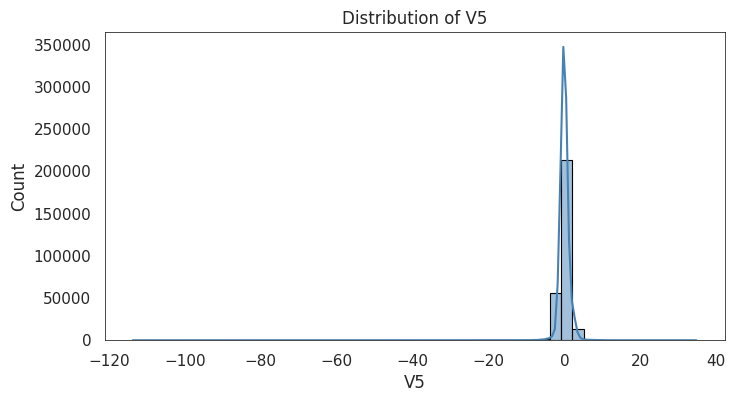

In [13]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
######################################################
###################### TO DO #########################
######################################################
features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']

sns.set(style="white")
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.5

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, bins=50, edgecolor='black', kde=True, color='steelblue')
    plt.title(f'Distribution of {feature}')    
    plt.show()
######################################################
######################################################
######################################################


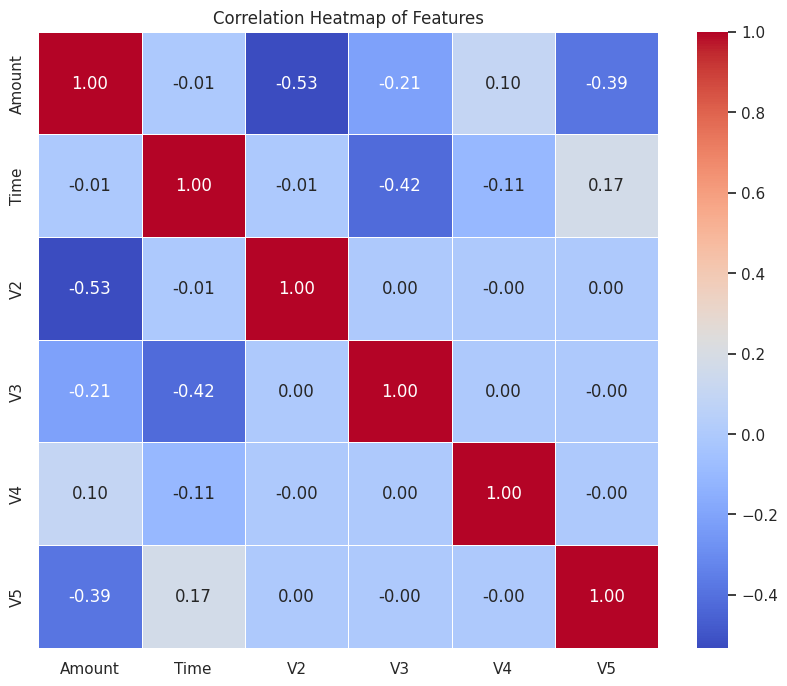

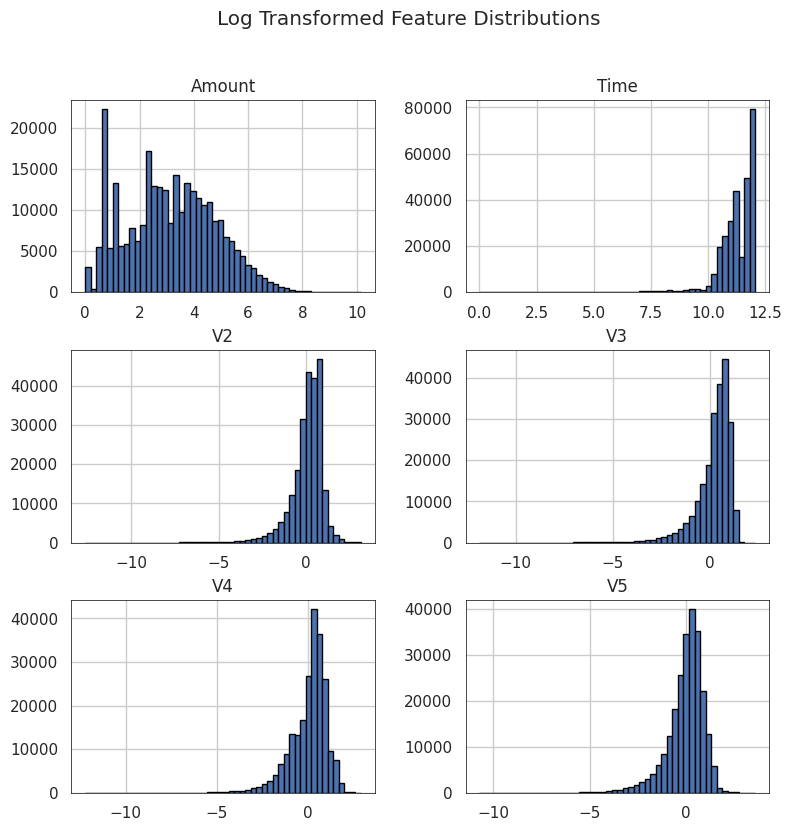

In [14]:
##########################################################
### You can add more creative analysis to learn more...###
##########################################################
# LOL I have no idea :D. Hmmm... lets play
plt.figure(figsize=(10, 8))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

##########################################################

df_log_transformed = df[features].apply(lambda x: np.log1p(x))
df_log_transformed.hist(bins=50, figsize=(9, 9), edgecolor='black')
plt.suptitle('Log Transformed Feature Distributions')
plt.show()
##########################################################
##########################################################
##########################################################

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:**  
  <font size="5" color="green">
  -  The first challenge is dataset is not balance. The number of 0 is more than 1.
  
     The second challenge is most of the features have a little effect on `class` based on confusion matrix.

     The third one is the distribution of data's are in different rages that need to be normalized.

<hr>

  -  Most features have low correlation with `class`

     Some features show a high correlation; For example, V2 and V3 have a strong negative correlation.

<hr>

  -  No! Because of the low correlation between features and the target and the high degree of class imbalance.

  </font>

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing testues, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [7]:
######################################################
###################### TO DO #########################
######################################################

# Outlier Detection and Treatment
# Use Robust Scaler to handle outliers
robust_scaler = RobustScaler()
X_scaled = robust_scaler.fit_transform(X)

# Handling Missing Values
df.fillna(df.median(), inplace=True)

######################################################
######################################################
######################################################

In [10]:
######################################################
###################### TO DO #########################
######################################################

# Data Transformation
# Using MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Standardization
# Using StandardScaler for standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

######################################################
######################################################
######################################################

In [13]:
##########################################################
#You can add more creative preprocessing to learn more...#
##########################################################

# Feature Selection
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)

##########################################################
##########################################################
##########################################################

In [15]:
##########################################################
#You can add more creative preprocessing to learn more...#
##########################################################

# Data Reduction
# Using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Choose the number of components
X_reduced = pca.fit_transform(X)

# Sampling
# Using train_test_split for sampling
X_train, X_sampled, y_train, y_sampled = train_test_split(X, y, test_size=0.1, random_state=42)

##########################################################
##########################################################
##########################################################

In [16]:
##########################################################
#You can add more creative preprocessing to learn more...#
##########################################################

# Resampling Techniques
## Oversampling Using SMOTE
# Using SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Undersampling
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)

##########################################################
##########################################################
##########################################################

In [17]:
##########################################################
#You can add more creative preprocessing to learn more...#
##########################################################

# Handling Imbalanced Data
## Using Class Weights in Models
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

## Putting It All Together
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X.columns)
    ])

# Combine preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

# Fit the model
pipeline.fit(X_train, y_train)

##########################################################
##########################################################
##########################################################

/home/andre/code/AI/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning etestuaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Etestuation your best model using K-Fold Cross testidation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

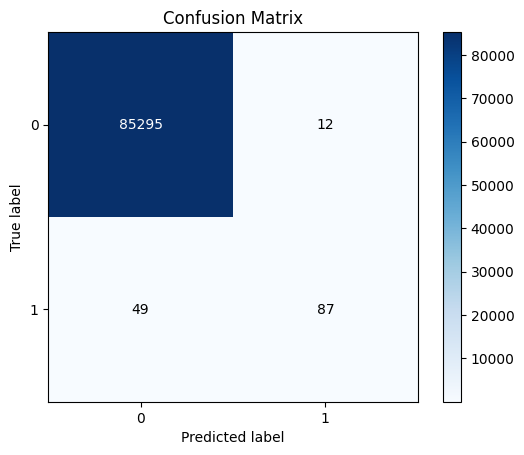

In [19]:
######################################################
###################### TO DO #########################
######################################################
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt



y_test_pred = model.predict(X_test)
y_test_pred.shape, y_test_pred
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)



print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)
######################################################
######################################################
######################################################


In [20]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################

# I have no more idea :D

###################################################################################
###################################################################################
###################################################################################

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [7]:
counts = df['Class'].value_counts()
num_zeros = counts[0]
num_ones = counts[1]

print(f"Number of 0s: {num_zeros}")
print(f"Number of 1s: {num_ones}")


Number of 0s: 284315
Number of 1s: 492


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

SVM Confusion Matrix:


/home/andre/code/AI/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/andre/code/AI/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/andre/code/AI/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

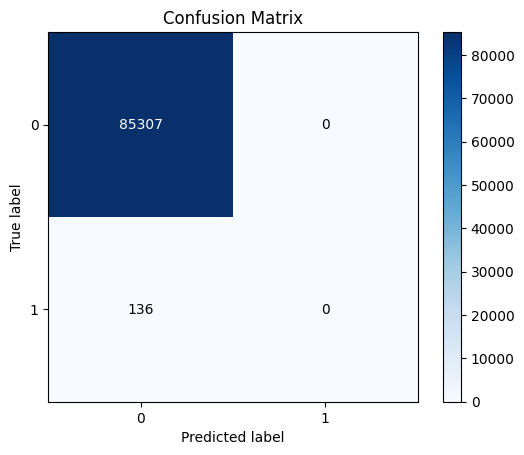

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

model = SVC(kernel='sigmoid', C=0.01, class_weight={0: 1, 1: 30})

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
print("SVM Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.68      0.78       136

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

SVM Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

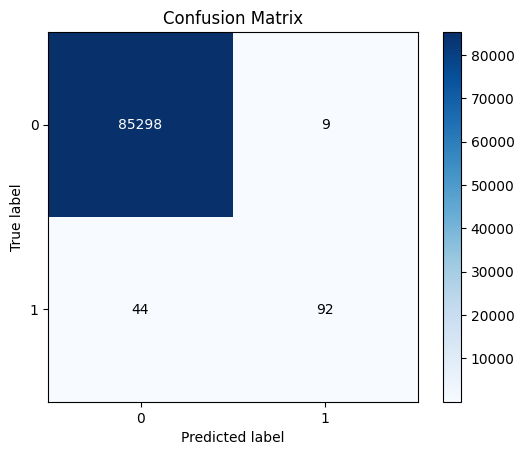

In [ ]:
######################################################
###################### TO DO #########################
######################################################
pass
######################################################
######################################################
######################################################

In [ ]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
pass
###################################################################################
###################################################################################
###################################################################################


## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:**  .......

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

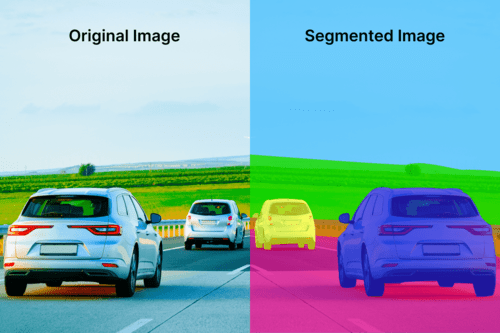

## Load Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /home/andre/code/AI/sharif AI course/elephant.jpg
100%|███████████████████████████████████████| 36.2k/36.2k [00:00<00:00, 197kB/s]


In [2]:
import cv2
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


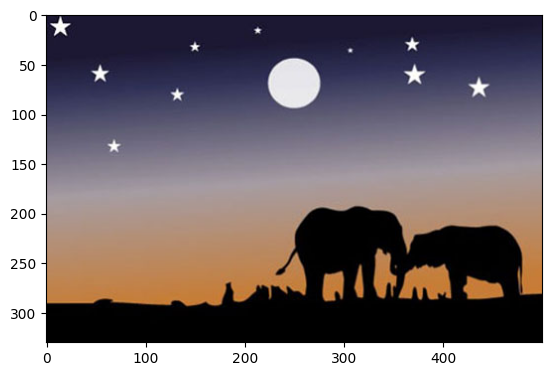

In [3]:
import matplotlib.pyplot as plt
plt.imshow(im) # as RGB Format
plt.show()

In [4]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








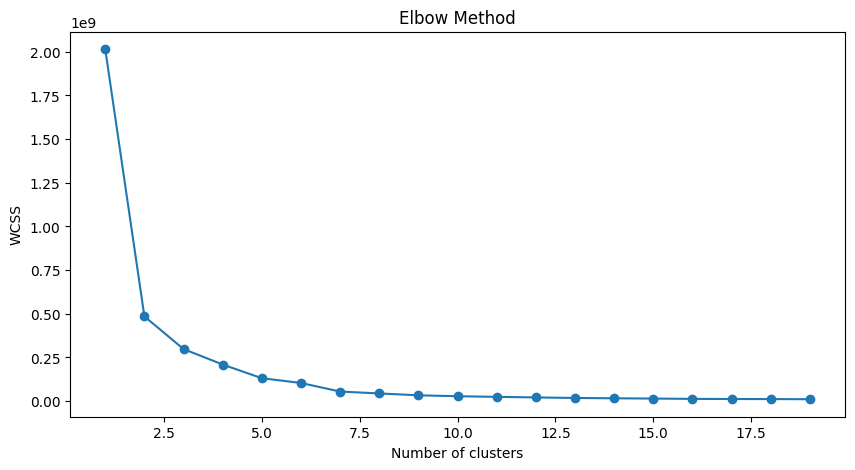

In [5]:
# Elbow Method or # Silhouette Score
######################################################
###################### TO DO #########################
######################################################
from sklearn.cluster import KMeans

plt.rcParams['axes.edgecolor'] = 'black'

def calculate_wcss(data):
    wcss = []
    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

wcss = calculate_wcss(all_pixels)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
######################################################
######################################################
######################################################


## Visualize Dominant Color

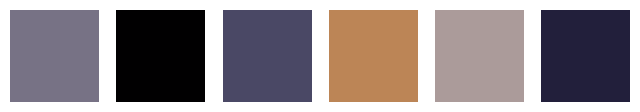

In [6]:
#######Plot the each of dominant color as image#######
####### Dominant colors are center of cluster ########
###################### TO DO #########################
num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(all_pixels)

dominant_colors = kmeans.cluster_centers_.astype(int)

plt.figure(figsize=(8, 1.2))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, num_clusters, i + 1)
    plt.imshow([[color]], aspect='auto')
    plt.axis('off')
plt.show()
######################################################
######################################################
######################################################

## Segmenting original image

In [7]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


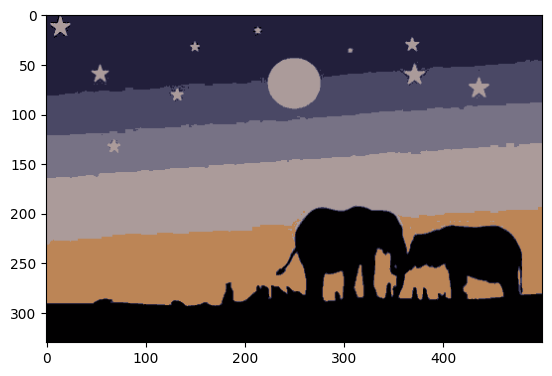

In [8]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()